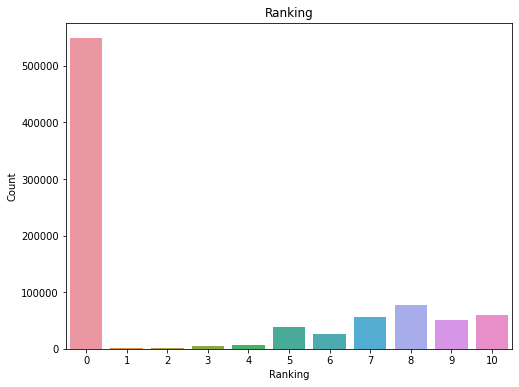

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#폰트 경고 삭제를 위한 코드
# from matplotlib import font_manager, rc
# font_path = "C:/Windows/Fonts/malgun.ttf" #맑은 고딕 폰트
# font = font_manager.FontProperties(fname = font_path).get_name()
# rc('font', family = font)

# train.csv 파일 읽기 (경로 설정)
df = pd.read_csv('train.csv')

# Book-Rating 갯수 출력
ds = df['Book-Rating'].value_counts().reset_index()
ds.columns = ['value', 'count']

fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x='value', y='count', data=ds, ax=ax)
ax.set_title('Ranking')
ax.set_xlabel('Ranking')
ax.set_ylabel('Count')
plt.show()

In [52]:
df_clean_rating=df[df['Book-Rating']!=0]

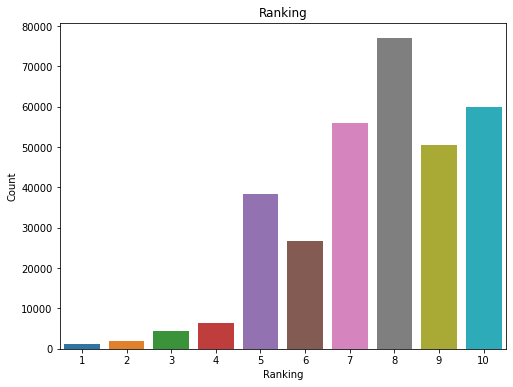

In [53]:
ds = df_clean_rating['Book-Rating'].value_counts().reset_index()
ds.columns = ['value', 'count']

fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x='value', y='count', data=ds, ax=ax)
ax.set_title('Ranking')
ax.set_xlabel('Ranking')
ax.set_ylabel('Count')
plt.show()

In [54]:
df_clean_year=df_clean_rating[df_clean_rating['Year-Of-Publication']>0]

- df_clean_year 는 rating 0삭제, year<0 삭제한 데이터프레임 저장
- df_clean_rating은 rating 0 삭제 후 저장

In [55]:
df_clean_age=df_clean_year[df_clean_year['Age']>=10]

In [56]:
df_clean_age=df_clean_age[df_clean_age['Age']<=100]

In [57]:
df_clean_age.groupby('Age').agg(cnt=('Age', 'count'))

,cnt
Age,
10.0,76
11.0,161
12.0,282
13.0,483
14.0,1197
...,...
96.0,1
97.0,46
98.0,1


/Users/isojeong/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/isojeong/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/isojeong/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/isojeong/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/isojeong/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from current f

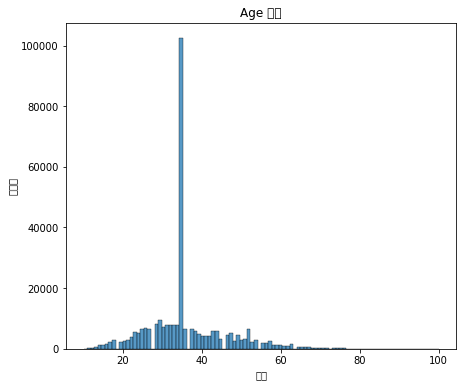

In [58]:
plt.figure(figsize=(7, 6))
sns.histplot(df_clean_age['Age'], bins=100)
plt.title('Age 분포')
plt.xlabel('나이')
plt.ylabel('빈도수')
plt.show()

In [59]:
df_clean_age.Age.min()

10.0

In [60]:
df_clean_age.Age.max()

100.0

- df_clean_age는 age가 10~100세, rating 0 날림, year<0 날림

In [61]:
# row 줄어듬!!!!
df_clean_age.shape

(315899, 10)

In [62]:
import pandas as pd
import html

def convert_html_entities(df_clean_age, column):
    df_clean_age[column] = df_clean_age[column].apply(html.unescape)
    return df_clean_age

# 사용 예시
df_clean_html = convert_html_entities(df_clean_age, 'Book-Title')
print(df_clean_html['Book-Title'])

0                                                Road Taken
1                         Macbeth (New Penguin Shakespeare)
4                                         She Who Remembers
5                        Neuromancer (Remembering Tomorrow)
6                                         The Little Prince
                                ...                        
871384        When Hope Springs New (Canadian West, Book 4)
871385    A Sand County Almanac and Sketches Here and Th...
871386     Earthdream: The Marriage of Reason and Intuition
871387    A Heartbreaking Work Of Staggering Genius : A ...
871391              Heartbreak Hill: Anatomy of a Ryder Cup
Name: Book-Title, Length: 315899, dtype: object


- html 특수문자를 일반 문자열로 전환 후 df_clean_html에 저장

In [63]:
# 데이터프레임의 "Book-Title" 열에서 "&amp;" 등장 횟수 계산
def count_hatcher_in_title(df):
    count = 0
    for title in df['Book-Title']:
        count += title.count("&amp;")
    return count


count = count_hatcher_in_title(df_clean_html)
print("Count of '&amp;' in Book-Title:", count)

Count of '&amp;' in Book-Title: 0


- count 결과가 0임, 특수 문자 제거함

In [64]:
df_clean_html.to_csv("train_clean_v1.csv")

In [65]:
df_clean_html.shape

(315899, 10)

In [66]:
df_clean_html = convert_html_entities(df_clean_html, 'Location')
print(df_clean_html['Location'])


count = count_hatcher_in_title(df_clean_html)
print("Count of '&amp;' in Book-Title:", count)

0          sackville, new brunswick, canada
1          sackville, new brunswick, canada
4          sackville, new brunswick, canada
5          sackville, new brunswick, canada
6          sackville, new brunswick, canada
                        ...                
871384              lakewood, colorado, usa
871385              lakewood, colorado, usa
871386    ilkley, yorkshire, united kingdom
871387                      houston, texas,
871391          maple grove, minnesota, usa
Name: Location, Length: 315899, dtype: object
Count of '&amp;' in Book-Title: 0


- Location도 똑같이 적용

In [67]:
df_clean_html = convert_html_entities(df_clean_html, 'Book-Author')
print(df_clean_html['Book-Author'])


count = count_hatcher_in_title(df_clean_html)
print("Count of '&amp;' in Book-Title:", count)

0                        Rona Jaffe
1               William Shakespeare
4                  Linda Lay Shuler
5                    William Gibson
6         Antoine de Saint-ExupÃ©ry
                    ...            
871384                  Janette Oke
871385                 Aldo Leopold
871386              Robert Hamilton
871387                  Dave Eggers
871391                Tim Rosaforte
Name: Book-Author, Length: 315899, dtype: object
Count of '&amp;' in Book-Title: 0


- 저자도 적용

In [68]:
df_clean_html = convert_html_entities(df_clean_html, 'Publisher')
print(df_clean_html['Publisher'])


count = count_hatcher_in_title(df_clean_html)
print("Count of '&amp;' in Book-Title:", count)

0                            Mira
1                   Penguin Books
4                     Signet Book
5                       Ace Books
6                   Harvest Books
                   ...           
871384              Bethany House
871385    Oxford University Press
871386                Green Books
871387           Simon & Schuster
871391              St Martins Pr
Name: Publisher, Length: 315899, dtype: object
Count of '&amp;' in Book-Title: 0


- 출판사도 적용

In [69]:
df_clean_html.to_csv("train_clean_v3.csv")

#train_clean_v2.csv은 출판사, 장소, 저자, 책 이름 &anp; 를 &로 바꾼 csv 파일

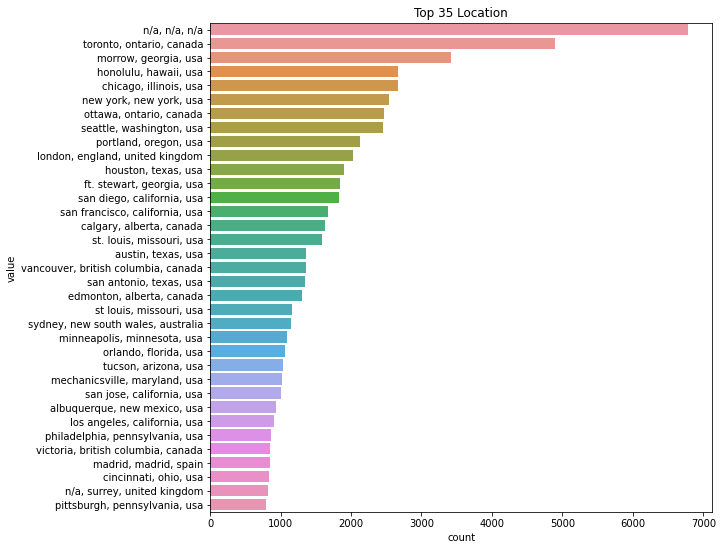

In [40]:
topLocation	 = df_clean_html['Location'].value_counts().reset_index()
topLocation.columns=['value','count']
topLocation['value'] = topLocation['value'].astype(str)
topLocation = topLocation.sort_values('count', ascending=False).head(35)

topLocation=topLocation.sort_values('count',ascending=False).head(100)

plt.figure(figsize=(9, 9))
sns.barplot(data=topLocation,x='count',y='value',orient='h')


plt.title('Top 35 Location')
plt.show()

In [41]:
# 장소에 n/a를 포함하면 drop

location_na=df_clean_html['Location'].str.contains("n/a")

df_clean_location=df_clean_html[~location_na]

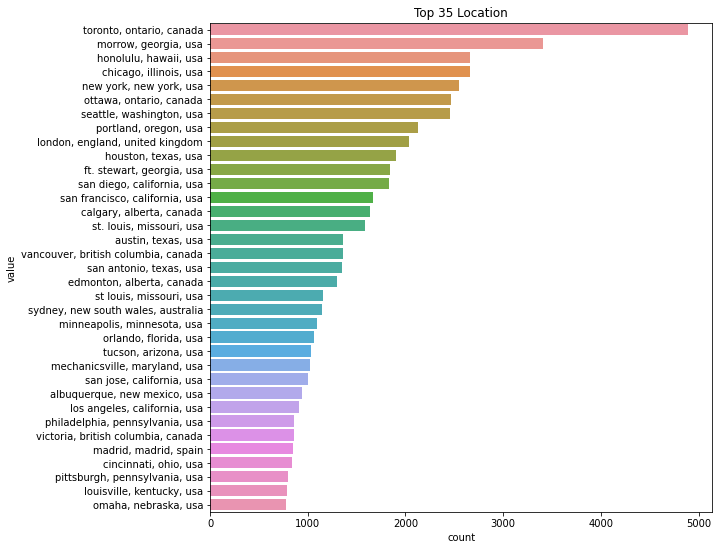

In [42]:
topLocation	 = df_clean_location['Location'].value_counts().reset_index()
topLocation.columns=['value','count']
topLocation['value'] = topLocation['value'].astype(str)
topLocation = topLocation.sort_values('count', ascending=False).head(35)

topLocation=topLocation.sort_values('count',ascending=False).head(100)

plt.figure(figsize=(9, 9))
sns.barplot(data=topLocation,x='count',y='value',orient='h')


plt.title('Top 35 Location')
plt.show()

In [43]:
df_clean_location.shape

(304243, 12)

- df_clean_location은 장소 n/a값제거, age가 10~100, year<0 제거, 모든 &anp;문자열을 &로 바꿔준 데이터 프레임

In [70]:
import chardet

def identify_encoding(txt):
    result = chardet.detect(txt.encode())
    return result['encoding']

# 데이터프레임의 'Location' 컬럼을 문자열로 변환
broken_text = ' '.join(df['Location'].astype(str))

# 인코딩 확인
encoding = identify_encoding(broken_text)
print(encoding)



utf-8


In [71]:
df_clean_location.head(20)

,ID,User-ID,Book-ID,Book-Rating,Age,Location,Book-Title,Book-Author,Year-Of-Publication,Publisher,Road Taken,Macbeth (New Penguin Shakespeare)
0,TRAIN_000000,USER_00000,BOOK_044368,8,23.0,"sackville, new brunswick, canada",Road Taken,Rona Jaffe,2001.0,Mira,Road Taken,Macbeth (New Penguin Shakespeare)
1,TRAIN_000001,USER_00000,BOOK_081205,8,23.0,"sackville, new brunswick, canada",Macbeth (New Penguin Shakespeare),William Shakespeare,1981.0,Penguin Books,Road Taken,Macbeth (New Penguin Shakespeare)
4,TRAIN_000004,USER_00000,BOOK_180810,8,23.0,"sackville, new brunswick, canada",She Who Remembers,Linda Lay Shuler,1989.0,Signet Book,Road Taken,Macbeth (New Penguin Shakespeare)
5,TRAIN_000005,USER_00000,BOOK_206799,5,23.0,"sackville, new brunswick, canada",Neuromancer (Remembering Tomorrow),William Gibson,1995.0,Ace Books,Road Taken,Macbeth (New Penguin Shakespeare)
6,TRAIN_000006,USER_00000,BOOK_239414,9,23.0,"sackville, new brunswick, canada",The Little Prince,Antoine de Saint-ExupÃ©ry,1982.0,Harvest Books,Road Taken,Macbeth (New Penguin Shakespeare)
8,TRAIN_000008,USER_00001,BOOK_190739,7,35.0,"wake forest, north carolina, usa",Self Matters : Creating Your Life from the Ins...,Phillip C. McGraw,2001.0,Free Press,Road Taken,Macbeth (New Penguin Shakespeare)
10,TRAIN_000010,USER_00001,BOOK_264949,5,35.0,"wake forest, north carolina, usa",Don't Let Jerks Get the Best of You / Advice F...,"Paul, Dr. Meier",1993.0,Thomas Nelson Inc,Road Taken,Macbeth (New Penguin Shakespeare)
12,TRAIN_000012,USER_00003,BOOK_006281,9,24.0,"magdeburg, sachsen-anhalt, germany",Wir sind Erinnerung. GedÃ?Â¤chtnis und PersÃ?Â...,Daniel L. Schacter,2001.0,Rowohlt Tb.,Road Taken,Macbeth (New Penguin Shakespeare)
13,TRAIN_000013,USER_00003,BOOK_017583,7,24.0,"magdeburg, sachsen-anhalt, germany",2061. Odyssee III. Roman.,Arthur C. Clarke,2000.0,Heyne,Road Taken,Macbeth (New Penguin Shakespeare)
14,TRAIN_000014,USER_00003,BOOK_047847,7,24.0,"magdeburg, sachsen-anhalt, germany",Die Jury. Roman.,John Grisham,1992.0,Heyne,Road Taken,Macbeth (New Penguin Shakespeare)


In [1]:
import pandas as pd

df=pd.read_csv("train_clean_v3.csv")
df.head()

,Unnamed: 0,ID,User-ID,Book-ID,Book-Rating,Age,Location,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0,TRAIN_000000,USER_00000,BOOK_044368,8,23.0,"sackville, new brunswick, canada",Road Taken,Rona Jaffe,2001.0,Mira
1,1,TRAIN_000001,USER_00000,BOOK_081205,8,23.0,"sackville, new brunswick, canada",Macbeth (New Penguin Shakespeare),William Shakespeare,1981.0,Penguin Books
2,4,TRAIN_000004,USER_00000,BOOK_180810,8,23.0,"sackville, new brunswick, canada",She Who Remembers,Linda Lay Shuler,1989.0,Signet Book
3,5,TRAIN_000005,USER_00000,BOOK_206799,5,23.0,"sackville, new brunswick, canada",Neuromancer (Remembering Tomorrow),William Gibson,1995.0,Ace Books
4,6,TRAIN_000006,USER_00000,BOOK_239414,9,23.0,"sackville, new brunswick, canada",The Little Prince,Antoine de Saint-ExupÃ©ry,1982.0,Harvest Books


In [3]:
df.shape

(315899, 11)

In [6]:
df.columns

Index(['Unnamed: 0', 'ID', 'User-ID', 'Book-ID', 'Book-Rating', 'Age',
       'Location', 'Book-Title', 'Book-Author', 'Year-Of-Publication',
       'Publisher'],
      dtype='object')

In [8]:
df=df[['ID', 'User-ID', 'Book-ID', 'Book-Rating', 'Age',
       'Location', 'Book-Title', 'Book-Author', 'Year-Of-Publication',
       'Publisher']]

In [10]:
df.head()

,ID,User-ID,Book-ID,Book-Rating,Age,Location,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,TRAIN_000000,USER_00000,BOOK_044368,8,23.0,"sackville, new brunswick, canada",Road Taken,Rona Jaffe,2001.0,Mira
1,TRAIN_000001,USER_00000,BOOK_081205,8,23.0,"sackville, new brunswick, canada",Macbeth (New Penguin Shakespeare),William Shakespeare,1981.0,Penguin Books
2,TRAIN_000004,USER_00000,BOOK_180810,8,23.0,"sackville, new brunswick, canada",She Who Remembers,Linda Lay Shuler,1989.0,Signet Book
3,TRAIN_000005,USER_00000,BOOK_206799,5,23.0,"sackville, new brunswick, canada",Neuromancer (Remembering Tomorrow),William Gibson,1995.0,Ace Books
4,TRAIN_000006,USER_00000,BOOK_239414,9,23.0,"sackville, new brunswick, canada",The Little Prince,Antoine de Saint-ExupÃ©ry,1982.0,Harvest Books


In [13]:
location_use=df['Location'].str.contains("usa")

df_location_use=df[location_use]

In [15]:
df_location_use.head(30)

,ID,User-ID,Book-ID,Book-Rating,Age,Location,Book-Title,Book-Author,Year-Of-Publication,Publisher
5,TRAIN_000008,USER_00001,BOOK_190739,7,35.0,"wake forest, north carolina, usa",Self Matters : Creating Your Life from the Ins...,Phillip C. McGraw,2001.0,Free Press
6,TRAIN_000010,USER_00001,BOOK_264949,5,35.0,"wake forest, north carolina, usa",Don't Let Jerks Get the Best of You / Advice F...,"Paul, Dr. Meier",1993.0,Thomas Nelson Inc
23,TRAIN_000034,USER_00004,BOOK_033489,8,35.0,"new york, new york, usa",Music & Silence,Rose Tremain,2000.0,Farrar Straus Giroux
24,TRAIN_000035,USER_00004,BOOK_053907,9,35.0,"new york, new york, usa",Atonement: A Novel,Ian McEwan,2002.0,Nan A. Talese
25,TRAIN_000036,USER_00004,BOOK_088342,7,35.0,"new york, new york, usa",The Black Madonna : A Novel,Louisa Ermelino,2001.0,Simon & Schuster
26,TRAIN_000037,USER_00004,BOOK_093673,8,35.0,"new york, new york, usa",The Dress Lodger (Ballantine Reader's Circle),Sheri Holman,2001.0,Ballantine Books
27,TRAIN_000039,USER_00004,BOOK_187286,7,35.0,"new york, new york, usa",The Monk Downstairs: A Novel,Tim Farrington,2002.0,HarperSanFrancisco
28,TRAIN_000040,USER_00004,BOOK_204356,8,35.0,"new york, new york, usa",Look at Me,JENNIFER EGAN,2001.0,Nan A. Talese
29,TRAIN_000041,USER_00004,BOOK_235466,5,35.0,"new york, new york, usa",Kitchen Confidential: Adventures in the Culina...,Anthony Bourdain,2001.0,Ecco
30,TRAIN_000043,USER_00005,BOOK_185485,7,35.0,"bend, oregon, usa",Pink Slip,RITA CIRESI,1999.0,Delta


In [16]:
df_location_use.shape

(217127, 10)

In [20]:
df_location_use.to_csv("location_usa.csv")